# Link do Dicionário do DATASET

https://drive.google.com/file/d/11xcaEgl1hpyfl2hnlFaa0MsxERd6uaKF/view

# Importações:

---

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [23]:
tabela2025 = pd.read_csv('acidentes2025_todas_causas_tipos.csv', sep=';')
tabela2024 = pd.read_csv('acidentes2024_todas_causas_tipos.csv', sep=';')
tabela2023 = pd.read_csv('acidentes2023_todas_causas_tipos.csv', sep=';')
tabela2022 = pd.read_csv('acidentes2022_todas_causas_tipos.csv', sep=';')
tabela2021 = pd.read_csv('acidentes2021_todas_causas_tipos.csv', sep=';')
tabela2020 = pd.read_csv('acidentes2020_todas_causas_tipos.csv', sep=';')

tabela2020_2025 = pd.concat([tabela2020, tabela2021, tabela2022, tabela2023, tabela2024, tabela2025], ignore_index=True)


# Informações Pincipais da Tabela:
---

In [24]:
print(tabela2020_2025.shape)

tabela2020_2025 = tabela2020_2025.dropna()

print(tabela2020_2025.info())

(2782541, 37)
<class 'pandas.core.frame.DataFrame'>
Index: 2222862 entries, 0 to 2782537
Data columns (total 37 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      float64
 1   pesid                   float64
 2   data_inversa            object 
 3   dia_semana              object 
 4   horario                 object 
 5   uf                      object 
 6   br                      float64
 7   km                      object 
 8   municipio               object 
 9   causa_principal         object 
 10  causa_acidente          object 
 11  ordem_tipo_acidente     int64  
 12  tipo_acidente           object 
 13  classificacao_acidente  object 
 14  fase_dia                object 
 15  sentido_via             object 
 16  condicao_metereologica  object 
 17  tipo_pista              object 
 18  tracado_via             object 
 19  uso_solo                object 
 20  id_veiculo              float64
 21  tipo_veiculo          

In [25]:
print(tabela2020_2025['causa_acidente'].value_counts(ascending=False))


causa_acidente
Reação tardia ou ineficiente do condutor                                         258995
Velocidade Incompatível                                                          229161
Ausência de reação do condutor                                                   205738
Condutor deixou de manter distância do veículo da frente                         141445
Acessar a via sem observar a presença dos outros veículos                        131960
                                                                                  ...  
Modificação proibida                                                                370
Semáforo com defeito                                                                284
Condutor não acionou o farol baixo durante o dia em rodovias de pista simples       196
Transitar na calçada                                                                170
Obstrução Via tentativa Assalto                                                      36
Name: count, Leng

In [39]:
print(tabela2020_2025['estado_fisico'].value_counts(ascending=False))

estado_fisico
Ileso            973381
Lesões Leves     834996
Lesões Graves    296672
Óbito            117813
Name: count, dtype: int64


# Analise Temporal
-----

In [26]:
# Convertendo a data inversa pra datetime
tabela2020_2025['data_inversa'] = pd.to_datetime(tabela2020_2025['data_inversa'],errors='coerce')

meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
         7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

# Criando colunas derivadas
tabela2020_2025.loc[:,'ano'] = tabela2020_2025['data_inversa'].dt.year
tabela2020_2025.loc[:,'mes'] = tabela2020_2025['data_inversa'].dt.month
tabela2020_2025.loc[:,'hora'] = pd.to_datetime(tabela2020_2025['horario'], format='%H:%M:%S', errors='coerce').dt.hour

tabela2020_2025['mes'] = tabela2020_2025['mes'].map(meses)

display(tabela2020_2025.head())

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop,ano,mes,hora
0,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,1.0,0.0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,Janeiro,1
1,260031.0,578987.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,1.0,0.0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,Janeiro,1
2,260031.0,578991.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,1.0,0.0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,Janeiro,1
3,260031.0,578986.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,1.0,0.0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,Janeiro,1
4,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,1.0,0.0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,Janeiro,1


In [27]:
tabela2020_2025['horario'].unique()

array(['01:00:00', '01:52:00', '01:15:00', ..., '03:07:00', '04:04:00',
       '03:39:00'], dtype=object)

In [28]:
# Acidentes por dia da semana
acidentes_por_dia = tabela2020_2025['dia_semana'].value_counts(ascending=False)

print('Acidentes por dia:')
print(tabela2020_2025)



Acidentes por dia:
               id      pesid data_inversa    dia_semana   horario  uf     br  \
0        260031.0   578988.0   2020-01-01  quarta-feira  01:00:00  TO  153.0   
1        260031.0   578987.0   2020-01-01  quarta-feira  01:00:00  TO  153.0   
2        260031.0   578991.0   2020-01-01  quarta-feira  01:00:00  TO  153.0   
3        260031.0   578986.0   2020-01-01  quarta-feira  01:00:00  TO  153.0   
4        260031.0   578475.0   2020-01-01  quarta-feira  01:00:00  TO  153.0   
...           ...        ...          ...           ...       ...  ..    ...   
2782529  705809.0  1571786.0   2025-05-01  quinta-feira  19:50:00  SE  101.0   
2782531  705809.0  1571786.0   2025-05-01  quinta-feira  19:50:00  SE  101.0   
2782533  705809.0  1571786.0   2025-05-01  quinta-feira  19:50:00  SE  101.0   
2782535  705809.0  1571786.0   2025-05-01  quinta-feira  19:50:00  SE  101.0   
2782537  705809.0  1571786.0   2025-05-01  quinta-feira  19:50:00  SE  101.0   

            km      

In [29]:
# Acidentes por hora
acidentes_por_hora = tabela2020_2025['horario'].value_counts().sort_values(ascending=False)

print('\nAcidentes por hora:')
print(acidentes_por_hora)


Acidentes por hora:
horario
19:00:00    31354
18:00:00    30255
18:30:00    30140
17:00:00    28139
17:30:00    24185
            ...  
03:04:00        8
01:51:00        8
03:37:00        7
02:14:00        5
04:04:00        1
Name: count, Length: 1440, dtype: int64


In [30]:
# Acidentes por mês
acidentes_por_mes = tabela2020_2025.groupby('mes').size()

print('\nAcidentes por mês:')
print(acidentes_por_mes)


Acidentes por mês:
mes
Abril        186210
Agosto       170245
Dezembro     202807
Fevereiro    180728
Janeiro      204509
Julho        181261
Junho        191370
Maio         202220
Março        185324
Novembro     166823
Outubro      182430
Setembro     168935
dtype: int64


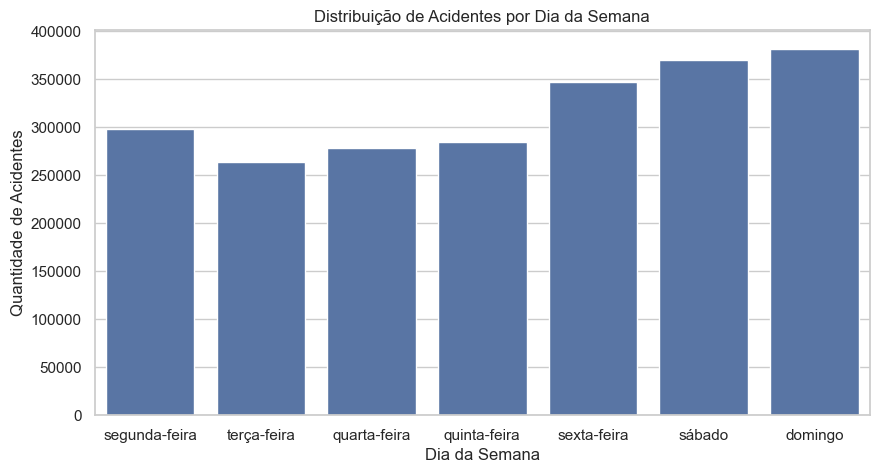

In [31]:
sns.set_theme(style="whitegrid")


# Acidentes por Dia da Semana
plt.figure(figsize=(10,5))
sns.countplot(data=tabela2020_2025, x='dia_semana', order=['segunda-feira','terça-feira','quarta-feira','quinta-feira','sexta-feira','sábado','domingo'])
plt.title('Distribuição de Acidentes por Dia da Semana')
plt.ylabel('Quantidade de Acidentes')
plt.xlabel('Dia da Semana')
plt.show()

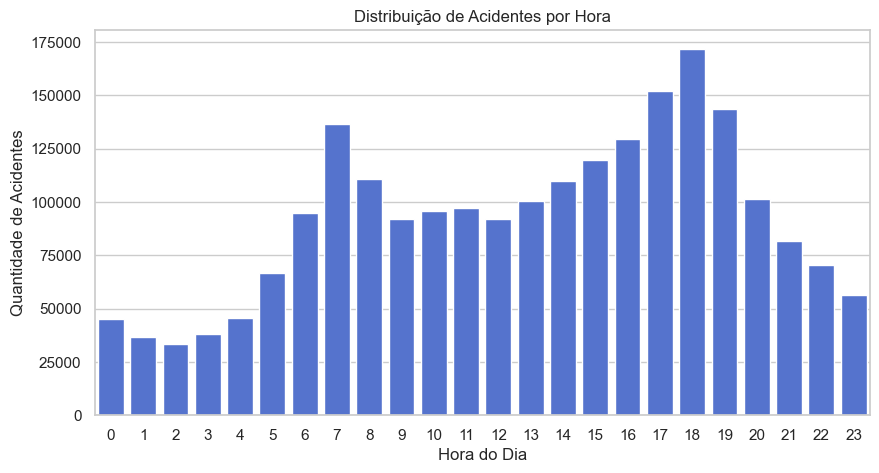

In [32]:
# Acidentes por hora do dia
plt.figure(figsize=(10,5))
sns.countplot(data=tabela2020_2025, x='hora', color='royalblue')
plt.title('Distribuição de Acidentes por Hora')
plt.ylabel('Quantidade de Acidentes')
plt.xlabel('Hora do Dia')
plt.show()

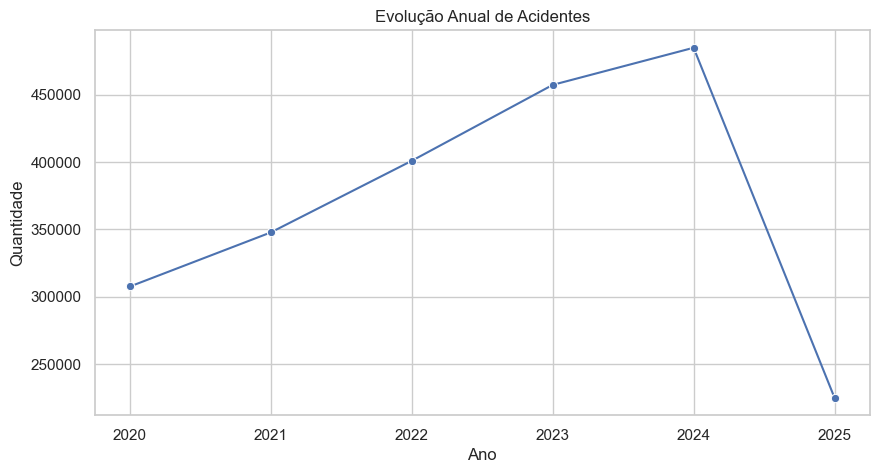

In [33]:
# Evolução ao longo dos anos (linha)
evolucao = tabela2020_2025.groupby('ano').size().reset_index(name='acidentes')
plt.figure(figsize=(10,5))
sns.lineplot(data=evolucao, x='ano', y='acidentes', marker='o')
plt.title('Evolução Anual de Acidentes')
plt.ylabel('Quantidade')
plt.xlabel('Ano')
plt.show()

## Primeira Conclusão da Análise Temporal
Apesar de percebermos que os dados estão bem destribuidos, nos finais de semana à noite, entre às 17 e 19 horas, são onde ocorrem a maioria dos acidentes

---

In [34]:
alcool = tabela2020_2025[tabela2020_2025['causa_acidente'] == 'Ingestão de álcool pelo condutor']
#display(alcool)

print(f"Totais de casos com alcool: {alcool.shape[0]} casos")

Totais de casos com alcool: 100077 casos


# Analise Geografica
---

In [35]:
# Locais de Principais Ocorrências de Acidentes
# Acidentes por UF (estado)
print(tabela2020_2025['uf'].value_counts())

# Acidentes por município
print(tabela2020_2025['municipio'].value_counts())

uf
MG    303010
PR    250372
SC    207308
RS    161972
SP    150921
RJ    124966
BA    118001
GO    116341
PE     87264
MT     80563
MS     78711
RO     71340
PB     59414
PI     58948
ES     54914
PA     52441
CE     46766
MA     44492
RN     34461
DF     34147
TO     30756
AL     13482
SE     13439
AC      8674
AM      7273
RR      7187
AP      5699
Name: count, dtype: int64
municipio
BRASILIA               34147
GUARULHOS              29070
CURITIBA               28676
SAO JOSE               20211
BETIM                  19799
                       ...  
BRASNORTE                  1
TELEMACO BORBA             1
CAMPINA DA LAGOA           1
SAO RAIMUNDO NONATO        1
MACAMBARA                  1
Name: count, Length: 2002, dtype: int64


## Conclusões Análise Geografica:
Estados de Minas Gerais, Santa Catarina, Paraná, Rio de Janeiro e Rio Grande do Sul são os estados mais abundantes em acidentes de t^ransito. A gente pode restringir a pesquisa para esses 5 estados.

---

# Gravidade e Vítimas 
---

In [36]:
# Classificação dos acidentes
print(tabela2020_2025['classificacao_acidente'].value_counts())


# Mortos e feridos leves por tipo de acidente
resultado = tabela2020_2025.groupby('tipo_acidente')[['mortos', 'feridos_leves']].sum()
resultado['total'] = resultado['mortos'] + resultado['feridos_leves']
resultado_ordenado = resultado.sort_values('total', ascending=False)

print(resultado_ordenado)


classificacao_acidente
Com Vítimas Feridas    1691463
Com Vítimas Fatais      326339
Sem Vítimas             205060
Name: count, dtype: int64
                                  mortos  feridos_leves     total
tipo_acidente                                                    
Saída de leito carroçável        19753.0       130259.0  150012.0
Tombamento                       16003.0       125637.0  141640.0
Queda de ocupante de veículo     15739.0       108886.0  124625.0
Colisão traseira                  7906.0       105808.0  113714.0
Colisão com objeto                9437.0        67156.0   76593.0
Capotamento                       7452.0        65470.0   72922.0
Colisão transversal               5170.0        63623.0   68793.0
Colisão frontal                  20817.0        46669.0   67486.0
Colisão lateral mesmo sentido     2482.0        44608.0   47090.0
Colisão lateral sentido oposto    2730.0        15623.0   18353.0
Colisão com objeto estático       1504.0        12099.0   13603.0


In [37]:
# Total de mortos e feridos em acidentes com álcool
print(tabela2020_2025['mortos'].value_counts())
print(f'Total: {0}',tabela2020_2025['mortos'].value_counts(ascending=False).sum())

mortos
0.0    2105049
1.0     117813
Name: count, dtype: int64
Total: 0 2222862
